# Part 1. Data 수집


In [209]:
#다음 분기 게임 기획을 위한 데이터 분석

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#데이터셋 불러오기 및 데이터 확인
data_org = pd.read_csv("vgames2.csv",index_col=[0])
data = data_org.copy()
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# Part 2. EDA & 전처리


**Data Description**
>- `Name` : 게임 이름
- `Platform` : 게임이 지원되는 플랫폼명
  - 'DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'
- `Year` : 게임 출시 연도
- `Genre` : 게임 장르
  - 'Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan
- `Publisher` : 게임을 배급한 회사
- `NA_Sales` : 북미지역에서의 출고량
- `EU_Sales` : 유럽지역에서의 출고량
- `JP_Sales` : 일본지역에서의 출고량
- `Other_Sales` : 기타지역에서의 출고량

**Platform**
>- 'DS'
- 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'
  분류 참고 : 
  - https://emulation.fandom.com/wiki/Video_Game_Emulation_Wiki
  - https://namu.wiki/w/%EC%97%90%EB%AE%AC%EB%A0%88%EC%9D%B4%ED%84%B0/%EA%B0%80%EC%A0%95%EC%9A%A9%20%EA%B2%8C%EC%9E%84%EA%B8%B0

In [210]:
data.info()  #(16598, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [211]:
#중복값 확인
data[data.duplicated(keep = False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8056,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [212]:
data.drop_duplicates(inplace=True)  # 중복행 제거
data = data.reset_index(drop=True)
data                                #(16597,9)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16593,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16594,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16595,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  object 
 6   EU_Sales     16597 non-null  object 
 7   JP_Sales     16597 non-null  object 
 8   Other_Sales  16597 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [214]:
data.isnull().sum() #결측치 수 확인

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [215]:
# 결측치 확인
miss=data[data['Year'].isnull() | data['Genre'].isnull()
        | data['Publisher'].isnull()]
print('결측치 존재 데이터 :')
miss[['Year', 'Genre', 'Publisher']]

결측치 존재 데이터 :


,Year,Genre,Publisher
31,NaN,Misc,Electronic Arts
50,2005.0,NaN,Sony Computer Entertainment
109,NaN,Racing,Unknown
272,2010.0,Simulation,NaN
273,NaN,Puzzle,Avanquest
...,...,...,...
16424,NaN,Misc,Unknown
16430,2007.0,NaN,THQ
16431,NaN,Puzzle,Unknown
16554,2010.0,NaN,Just Flight


**메모** <br>
 0   Name  <br>
 1   Platform object → 2600을 A2600로 변환  <br>
 2   Year float64 → 결측치, '0', 'Adventure', 이상치 존재, int 형으로 변환 / ~2020  <br>
 3   Genre object → 결측치 처리, 카테고리형으로 변경?, 'Platform', 'Misc' 데이터 확인, 같은 게임별로 그룹핑해서 장르 확인해봐야함  <br>
 4   Publisher object → 결측치, unknown 처리(결측여부가 Year데이터와 거의 동일)  <br>
 5   NA_Sales object → float형으로 변환, 문자열(K,M) 처리 (이하 동일)  <br>
 6   EU_Sales object  <br>
 7   JP_Sales object  <br>
 8   Other_Sales object  <br>

##2-1. Sales

In [216]:
# K와 M이 포함된 Sales 컬럼들의 데이터 확인
data[data.iloc[:,-4].str.contains('K|M') | data.iloc[:,-3].str.contains('K|M') | data.iloc[:,-2].str.contains('K|M') | data.iloc[:,-1].str.contains('K|M')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
36,Advance Wars: Dual Strike,DS,2005.0,Strategy,Nintendo,0.3,0.03M,0.04,0.03
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
64,SD Gundam Force,GBA,2004.0,Shooter,Namco Bandai Games,0.01,0,0,0M
73,Teenage Mutant Ninja Turtles,XB,2003.0,Action,Konami Digital Entertainment,0.22,0.06,0,0.01M
...,...,...,...,...,...,...,...,...,...
16524,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0K,0,0
16570,Koihime Enbu,PS4,2016.0,Fighting,Yeti,0,0M,0.02,0
16577,Gex: Enter the Gecko,PS,1998.0,Platform,BMG Interactive Entertainment,320K,0.22,0,0.04
16579,Captain Morgane and the Golden Turtle,DS,2012.0,Adventure,Reef Entertainment,0,0.03,0M,0


In [217]:
# 문자열 제거, 타입변환

# for loop으로 각 sales열 수행
# K 포함 데이터 -> K 없애고 따로 변수 생성해서 저장.. K_data -> * 0.001
# M 포함 데이터 -> M 없애고 따로 변수 생성해서 저장.. M_data 

sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

cvr_sales = pd.DataFrame()

for col in sales:
  error_K = data[data[col].str.contains('K')]
  cvr_K = error_K[col].str.replace("K", "").astype('float')
  cvr_K = cvr_K*0.001

  error_M = data[data[col].str.contains('M')]
  cvr_M = error_M[col].str.replace("M", "").astype('float')

  result = pd.concat([cvr_K, cvr_M], axis = 0).sort_index()
  cvr_sales = pd.concat([cvr_sales, result], axis = 1)

cvr_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,0.48,0.33,0.0,NaN
36,NaN,0.03,NaN,NaN
45,0.06,NaN,NaN,NaN
64,NaN,NaN,NaN,0.00
73,NaN,NaN,NaN,0.01
...,...,...,...,...
16524,NaN,0.00,NaN,NaN
16570,NaN,0.00,NaN,NaN
16577,0.32,NaN,NaN,NaN
16579,NaN,NaN,0.0,NaN


In [218]:
data.update(cvr_sales)
data.iloc[cvr_sales.index]  #Sales값 변경되었는지 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,0.48,0.33,0.0,0.06
36,Advance Wars: Dual Strike,DS,2005.0,Strategy,Nintendo,0.3,0.03,0.04,0.03
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,0.06,0.08,0.16,0.03
64,SD Gundam Force,GBA,2004.0,Shooter,Namco Bandai Games,0.01,0,0,0.0
73,Teenage Mutant Ninja Turtles,XB,2003.0,Action,Konami Digital Entertainment,0.22,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...
16524,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.0,0,0
16570,Koihime Enbu,PS4,2016.0,Fighting,Yeti,0,0.0,0.02,0
16577,Gex: Enter the Gecko,PS,1998.0,Platform,BMG Interactive Entertainment,0.32,0.22,0,0.04
16579,Captain Morgane and the Golden Turtle,DS,2012.0,Adventure,Reef Entertainment,0,0.03,0.0,0


In [219]:
data = data.astype({'NA_Sales':'float64', 'EU_Sales':'float64', 'JP_Sales':'float64', 'Other_Sales':'float64'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  float64
 6   EU_Sales     16597 non-null  float64
 7   JP_Sales     16597 non-null  float64
 8   Other_Sales  16597 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


## 2-2. Year

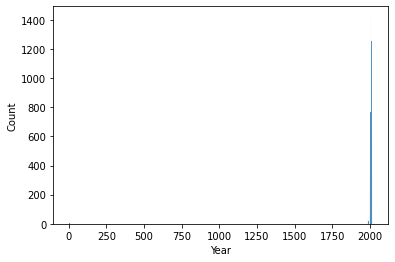

In [220]:
sns.histplot(data=data, x='Year')

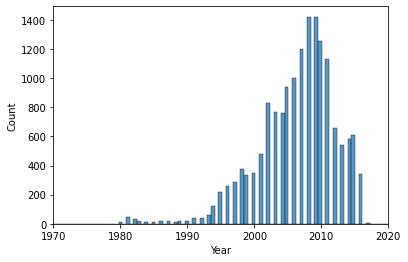

In [221]:
plt.xlim(1970,2020)
sns.histplot(data=data, x='Year');

In [222]:
# 같은 게임에 대해 다른 연도에 출시된 데이터 유무 확인(<-플랫폼 다름)

data=data.sort_values(['Name','Year'])
df2=data.groupby('Name')['Year'].value_counts(sort=False).to_frame()
df2=df2.rename(columns={'Year':'Year_Counts'})
df2=df2.reset_index()
df2[df2.Name.duplicated(keep=False)]

,Name,Year,Year_Counts
28,11eyes: CrossOver,2009.0,1
29,11eyes: CrossOver,2010.0,1
35,18 Wheeler: American Pro Trucker,2001.0,1
36,18 Wheeler: American Pro Trucker,2002.0,1
49,2 in 1 Combo Pack: Sonic Heroes / Super Monkey...,2004.0,1
...,...,...,...
12003,Ys: The Ark of Napishtim,2006.0,1
12110,ZombiU,2012.0,1
12111,ZombiU,2016.0,1
12118,Zoo Hospital,2007.0,1


In [223]:
# NAN을 0으로 바꾸기 전에 기존 0 값 또는 연도로 보기에는 작은 data값 수정

# Year컬럼의 오류 데이터 확인
yr_err = data[(data.Year < 1980) | (data.Year.isnull())] # 1980 미만인 데이터(이상치) + 결측치값, 총 370개
yr_err

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10704,3D Baseball,PS,96.0,Sports,BMG Interactive Entertainment,0.02,0.01,0.00,0.00
11640,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,NaN,0.00,0.00,0.01,0.00
9290,Ace Combat: Assault Horizon Legacy,3DS,11.0,Simulation,Namco Bandai Games,0.10,0.06,0.08,0.01
3184,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0.00,0.01
10083,Advance Wars: Days of Ruin,DS,NaN,Strategy,Nintendo,0.44,0.13,0.00,0.06
...,...,...,...,...,...,...,...,...,...
15668,Yu Yu Hakusho: Dark Tournament,PS2,NaN,Fighting,NaN,0.10,0.08,0.00,0.03
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.00,0.00,0.02,0.00
13588,Zero: Tsukihami no Kamen,Wii,NaN,Action,Nintendo,0.00,0.00,0.08,0.00
3135,eJay Clubworld,PS2,NaN,Misc,Empire Interactive,0.07,0.06,0.00,0.02


In [224]:
yr_err.Year.unique()  # Year에서 80~100인 숫자는 1900년대, 0~16인 숫자는 2000년대로 보임

array([96., nan, 11., 86., 97.,  9., 16., 10.,  7.,  3.,  6.,  8.,  5.,
        2.,  4., 95., 98., 13., 15., 14.,  1.,  0., 12., 94.])

In [225]:
# yr_err의 Year 값을 대체하기 위해 data에서 동일 Name 찾고자 함
nm = yr_err.Name.unique() # 330개
yr_err.Name.nunique()

330

In [226]:
# Year 정상값이 존재하는 datatable(Name, Year 동시 중복행은 제거) 생성
name_yr_cln = data.copy()
name_yr_cln = name_yr_cln.drop(yr_err.index)
name_yr_cln = name_yr_cln.drop_duplicates(['Name','Year']).sort_values(['Name','Year']).reset_index()  #12066
# name_yr_cln[name_yr_cln.duplicated('Name', keep=False)]  # 총 1451, 동일이름·다른 출시연도 데이터 확인
name_yr_cln

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,12909,'98 Koshien,PS,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03
1,15929,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
2,7132,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03
3,10646,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00
4,13147,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
...,...,...,...,...,...,...,...,...,...,...
12061,6566,thinkSMART FAMILY!,Wii,2010.0,Misc,Conspiracy Entertainment,0.03,0.00,0.00,0.00
12062,3495,thinkSMART: Chess for Kids,DS,2011.0,Misc,Mentor Interactive,0.01,0.00,0.00,0.00
12063,13963,uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0.00,0.20
12064,3062,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0.00,0.00


In [227]:
name_yr_cln = name_yr_cln.sort_values(['Name','Year']).reset_index(drop=True)
name_yr_cln.tail(10)

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
12056,5342,inFAMOUS: Second Son,PS4,2014.0,Action,Sony Computer Entertainment,1.27,0.97,0.07,0.47
12057,11193,nail'd,X360,2010.0,Racing,Deep Silver,0.08,0.02,0.00,0.01
12058,2709,pro evolution soccer 2011,X360,2010.0,Sports,Konami Digital Entertainment,0.09,0.44,0.00,0.07
12059,2770,th!nk Logic Trainer,Wii,2009.0,Puzzle,Conspiracy Entertainment,0.01,0.00,0.00,0.00
12060,15922,thinkSMART,DS,2010.0,Misc,Conspiracy Entertainment,0.09,0.00,0.00,0.01
12061,6566,thinkSMART FAMILY!,Wii,2010.0,Misc,Conspiracy Entertainment,0.03,0.00,0.00,0.00
12062,3495,thinkSMART: Chess for Kids,DS,2011.0,Misc,Mentor Interactive,0.01,0.00,0.00,0.00
12063,13963,uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0.00,0.20
12064,3062,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0.00,0.00
12065,215,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,0.00,0.00,0.14,0.00


In [228]:
name_yr_cln_part = name_yr_cln.drop_duplicates('Name').loc[:,['Name','Year']] # 동일게임에 대해 처음 출시연도만 남김
name_yr_cln_part                                                 # 즉, 결측치,이상값을 처음 출시연도로 대체

,Name,Year
0,'98 Koshien,1998.0
1,.hack//G.U. Vol.1//Rebirth,2006.0
2,.hack//G.U. Vol.2//Reminisce,2006.0
3,.hack//G.U. Vol.2//Reminisce (jp sales),2006.0
4,.hack//G.U. Vol.3//Redemption,2007.0
...,...,...
12061,thinkSMART FAMILY!,2010.0
12062,thinkSMART: Chess for Kids,2011.0
12063,uDraw Studio,2010.0
12064,uDraw Studio: Instant Artist,2011.0


In [229]:
# NaN 또는 이상치에 대해 Name 이 같은 다른 데이터에서 Year 값 가져옴

i1=[]
for i in yr_err.index:
  if yr_err.loc[i,'Name'] in list(name_yr_cln_part['Name']):
    i1.append(i)
    yr_err.at[i,"Year"] = name_yr_cln_part[yr_err.loc[i,"Name"] == name_yr_cln_part['Name']].Year

print('변경된 row index:',i1)
print('변경된 row 개수:',len(i1))
yr_err.loc[i1]

변경된 row index: [11640, 7150, 11262, 675, 9297, 4608, 10268, 16431, 5140, 6159, 6392, 11475, 2130, 12985, 2337, 14302, 2429, 7008, 13677, 15487, 5175, 3182, 6385, 10774, 9697, 3879, 2202, 8765, 9325, 11959, 16148, 8144, 5946, 10964, 2026, 11235, 16239, 6354, 13487, 11187, 3492, 11604, 4800, 11404, 6512, 8076, 12709, 15331, 5160, 5674, 11144, 15401, 15446, 9576, 6130, 304, 3347, 9957, 5309, 9239, 9761, 10320, 10345, 10562, 15316, 8529, 1364, 8583, 13843, 7682, 2142, 10300, 16277, 2492, 6949, 358, 808, 3407, 9876, 1285, 1041, 4839, 11162, 1879, 13751, 768, 213, 12786, 4727, 11507, 12087, 15405, 12815, 1903, 3108, 4165, 10718, 15146, 10636, 14435, 14967, 3832, 7555, 15611, 3069, 6178, 14579, 10031, 4238, 6223, 5957, 1409, 14002, 15654, 14571, 5757, 8839, 7845, 7178, 4255, 6779, 13733, 16194, 15498, 8651, 16274, 2249, 8333, 1684, 12323, 1093, 10143, 1613, 3841, 16481, 8191, 15000, 3291, 13582, 11518, 14160, 2056, 2552, 11331, 4488, 11664, 7619, 2548, 952, 10914, 1572, 10326, 5314, 548, 1011

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11640,AKB1/48: Idol to Guam de Koishitara...,X360,2011.0,Misc,NaN,0.00,0.00,0.01,0.00
7150,Aquaman: Battle for Atlantis,XB,2003.0,Action,Unknown,0.01,0.00,0.00,0.00
11262,Assetto Corsa,PS4,2016.0,Racing,505 Games,0.00,0.04,0.00,0.01
675,Battle vs. Chess,PS3,2011.0,Misc,TopWare Interactive,0.00,0.04,0.00,0.01
9297,Battle vs. Chess,PC,2011.0,Misc,TopWare Interactive,0.00,0.02,0.00,0.01
...,...,...,...,...,...,...,...,...,...
6118,Wheel of Fortune,PS2,1997.0,Misc,Unknown,0.47,0.36,0.00,0.12
10405,Winning Eleven: Pro Evolution Soccer 2007,PC,2006.0,Sports,Konami Digital Entertainment,0.00,0.01,0.00,0.00
15775,Without Warning,XB,2005.0,Shooter,Capcom,0.01,0.00,0.00,0.00
1015,Wolfenstein,PC,2009.0,Shooter,Activision,0.01,0.03,0.00,0.01


In [230]:
name_yr_cln_part[yr_err.loc[11640,"Name"] == name_yr_cln_part['Name']].Year # 하나 테스트

119    2011.0
Name: Year, dtype: float64

In [231]:
data.loc[i1, 'Year'] = yr_err.loc[i1, 'Year']  #data에 수정된 year 값 넣기
data.loc[i1]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11640,AKB1/48: Idol to Guam de Koishitara...,X360,2011.0,Misc,NaN,0.00,0.00,0.01,0.00
7150,Aquaman: Battle for Atlantis,XB,2003.0,Action,Unknown,0.01,0.00,0.00,0.00
11262,Assetto Corsa,PS4,2016.0,Racing,505 Games,0.00,0.04,0.00,0.01
675,Battle vs. Chess,PS3,2011.0,Misc,TopWare Interactive,0.00,0.04,0.00,0.01
9297,Battle vs. Chess,PC,2011.0,Misc,TopWare Interactive,0.00,0.02,0.00,0.01
...,...,...,...,...,...,...,...,...,...
6118,Wheel of Fortune,PS2,1997.0,Misc,Unknown,0.47,0.36,0.00,0.12
10405,Winning Eleven: Pro Evolution Soccer 2007,PC,2006.0,Sports,Konami Digital Entertainment,0.00,0.01,0.00,0.00
15775,Without Warning,XB,2005.0,Shooter,Capcom,0.01,0.00,0.00,0.00
1015,Wolfenstein,PC,2009.0,Shooter,Activision,0.01,0.03,0.00,0.01


In [232]:
# data[data['Name']=='Age of Empires III: Complete Collection'] #처리해야함

In [233]:
data = data.reset_index(drop=True)

In [234]:
data[data.Year<1980]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,3D Baseball,PS,96.0,Sports,BMG Interactive Entertainment,0.02,0.01,0.00,0.00
192,Ace Combat: Assault Horizon Legacy,3DS,11.0,Simulation,Namco Bandai Games,0.10,0.06,0.08,0.01
218,Adventure Island,NES,86.0,Platform,Hudson Soft,0.00,0.00,1.05,0.00
244,AeroFighters Assault,N64,97.0,Action,Video System,0.15,0.04,0.00,0.00
262,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03
780,Azure Striker Gunvolt: Striker Pack,3DS,16.0,Action,Inti Creates,0.00,0.00,0.01,0.00
1661,Buzz! Brain of the UK,PS3,9.0,Misc,Sony Computer Entertainment,0.00,0.15,0.00,0.02
1994,Casual Mania!,DS,10.0,Puzzle,Foreign Media Games,0.04,0.00,0.00,0.00
3219,Disney's Chicken Little: Ace In Action,DS,6.0,Shooter,Disney Interactive Studios,0.06,0.00,0.00,0.00
3544,Dragon Quest Heroes: Rocket Slime,DS,5.0,Action,Square Enix,0.13,0.00,0.31,0.01


In [235]:
i_20 = []
i_100 = []

for i, yr in enumerate(data.Year):
  if ((yr>=0)&(yr<20)) :
    i_20.append(i)
    data.loc[i, 'Year'] += 2000
  if ((yr>=80)&(yr<100)) :
    i_100.append(i)
    data.loc[i, 'Year'] += 1900

print(i_20)
print(i_100)
data

[192, 262, 780, 1661, 1994, 3219, 3544, 3947, 4280, 4297, 4326, 4478, 4750, 5020, 5437, 5760, 6077, 6675, 6899, 7016, 8177, 8509, 8662, 9224, 9492, 9906, 9988, 10000, 10101, 10475, 10482, 10556, 11072, 11299, 11690, 11729, 12413, 12879, 13221, 14142, 14214, 14574, 14621, 14776, 15127, 15409, 15873, 16402]
[74, 218, 244, 4883, 8441, 13268, 13347, 15192, 15559]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,'98 Koshien,PS,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03
1,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
2,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00
4,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
...,...,...,...,...,...,...,...,...,...
16592,uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0.00,0.20
16593,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0.00,0.00
16594,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,0.08,0.09,0.00,0.02
16595,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41


In [236]:
data.Year.unique()

array([1998., 2006., 2007., 2002., 2010., 2003., 2012., 2000., 2008.,
       1999., 2013., 2009., 2011., 2014., 2016., 2001., 2005., 1985.,
       2004., 1996., 1995., 2015., 1984., 1997., 1994., 1982.,   nan,
       1986., 1989., 1981., 1980., 1983., 1991., 1992., 1993., 2017.,
       1987., 1990., 1988., 2020.])

In [237]:
data = data.dropna(subset=['Year']) #Year 컬럼 결측치 제거

In [238]:
data.Year = data.Year.astype('int')
data.Year.unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([1998, 2006, 2007, 2002, 2010, 2003, 2012, 2000, 2008, 1999, 2013,
       2009, 2011, 2014, 2016, 2001, 2005, 1985, 2004, 1996, 1995, 2015,
       1984, 1997, 1994, 1982, 1986, 1989, 1981, 1980, 1983, 1991, 1992,
       1993, 2017, 1987, 1990, 1988, 2020])

## 2-3. Platform

In [239]:
# 2600 → A2600 변경

data.Platform.replace('2600','A2600',inplace=True)
data.Platform.unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array(['PS', 'PS2', 'PSP', 'PS3', 'Wii', 'PC', 'DS', 'X360', 'N64', '3DS',
       'GC', 'XB', 'NES', 'GBA', 'PSV', 'PS4', 'XOne', 'SNES', 'A2600',
       'WiiU', 'SAT', 'GB', 'NG', 'GEN', 'PCFX', 'DC', '3DO', 'WS',
       'TG16', 'SCD', 'GG'], dtype=object)

## 2-4. Genre


In [240]:
data=data.sort_values(['Name','Genre'])
data[data.duplicated(['Name'])]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13,007: Quantum of Solace,Wii,2008,Action,Activision,0.30,0.29,0.01,0.07
14,007: Quantum of Solace,PS3,2008,Action,Activision,0.43,0.52,0.02,0.20
15,007: Quantum of Solace,PC,2008,Action,Activision,0.01,0.01,0.00,0.00
16,007: Quantum of Solace,DS,2008,Action,Activision,0.11,0.01,0.00,0.01
17,007: Quantum of Solace,X360,2008,Action,Activision,0.82,0.52,0.01,0.14
...,...,...,...,...,...,...,...,...,...
16584,pro evolution soccer 2011,PS3,2010,Sports,Konami Digital Entertainment,0.29,1.18,0.54,0.41
16585,pro evolution soccer 2011,PSP,2010,Sports,Konami Digital Entertainment,0.05,0.30,0.29,0.16
16586,pro evolution soccer 2011,Wii,2010,Sports,Konami Digital Entertainment,0.08,0.10,0.03,0.02
16587,pro evolution soccer 2011,PS2,2010,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11


In [241]:
#결측치 확인 및 처리

gnr_err = data[data.Genre.isnull()] # Genre 오류값
gnr_err  #(50,9)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
503,Apache: Air Assault,PC,2010,NaN,Just Flight,0.00,0.03,0.00,0.01
511,Ape Escape: On the Loose,PSP,2005,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
705,Astonishia Story,PSP,2006,NaN,Ubisoft,0.03,0.00,0.00,0.00
801,Back to the Future: The Game,XOne,2015,NaN,Telltale Games,0.00,0.02,0.00,0.00
853,Bakemonogatari Portable,PSP,2012,NaN,Namco Bandai Games,0.00,0.00,0.05,0.00
965,Batman Beyond: Return of the Joker,N64,2000,NaN,Ubisoft,0.07,0.02,0.00,0.00
1360,Bloodborne,PS4,2015,NaN,Sony Computer Entertainment,1.00,0.76,0.26,0.36
1474,Brain Boost: Beta Wave,DS,2005,NaN,505 Games,0.14,0.00,0.00,0.01
1480,Brain Quest: Grades 5 & 6,DS,2008,NaN,Electronic Arts,0.11,0.00,0.00,0.01
1932,Cars: Mater-National Championship,X360,2007,NaN,THQ,0.13,0.00,0.00,0.01


In [242]:
gnr_cln = data.copy()
gnr_cln = gnr_cln.drop(gnr_err.index)
gnr_cln = gnr_cln.drop_duplicates('Name').sort_values(['Name','Genre']).reset_index() # 동일게임에 대해 한가지 장르 데이터만 남김
gnr_cln  #(11463,10)

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0,'98 Koshien,PS,1998,Sports,Magical Company,0.15,0.10,0.12,0.03
1,1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
2,2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03
3,3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00
4,4,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
...,...,...,...,...,...,...,...,...,...,...
11325,16590,thinkSMART FAMILY!,Wii,2010,Misc,Conspiracy Entertainment,0.03,0.00,0.00,0.00
11326,16591,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00
11327,16592,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20
11328,16593,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00


In [243]:
# NaN에 대해 Name 이 같은 다른 데이터에서 Genre 값 가져옴

i2=[]
for i in gnr_err.index:
  if gnr_err.loc[i,'Name'] in list(gnr_cln['Name']):
    i2.append(i)
    index = gnr_cln.loc[gnr_err.loc[i,"Name"] == gnr_cln['Name']].index[0]
    gnr_err.at[i,"Genre"] = gnr_cln.loc[index, 'Genre']

print('변경된 row index:',i2)
print('변경된 row 개수:',len(i2))
gnr_err.head(10)

변경된 row index: [503, 801, 965, 1932, 2210, 3512, 5252, 6055, 6319, 6722, 7597, 7705, 9070, 9313, 9610, 12498, 12512, 14125, 14354, 14742]
변경된 row 개수: 20


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
503,Apache: Air Assault,PC,2010,Simulation,Just Flight,0.00,0.03,0.00,0.01
511,Ape Escape: On the Loose,PSP,2005,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
705,Astonishia Story,PSP,2006,NaN,Ubisoft,0.03,0.00,0.00,0.00
801,Back to the Future: The Game,XOne,2015,Adventure,Telltale Games,0.00,0.02,0.00,0.00
853,Bakemonogatari Portable,PSP,2012,NaN,Namco Bandai Games,0.00,0.00,0.05,0.00
965,Batman Beyond: Return of the Joker,N64,2000,Action,Ubisoft,0.07,0.02,0.00,0.00
1360,Bloodborne,PS4,2015,NaN,Sony Computer Entertainment,1.00,0.76,0.26,0.36
1474,Brain Boost: Beta Wave,DS,2005,NaN,505 Games,0.14,0.00,0.00,0.01
1480,Brain Quest: Grades 5 & 6,DS,2008,NaN,Electronic Arts,0.11,0.00,0.00,0.01
1932,Cars: Mater-National Championship,X360,2007,Racing,THQ,0.13,0.00,0.00,0.01


In [244]:
data.loc[i2, 'Genre'] = gnr_err.loc[i2, 'Genre']  #data에 수정된 Genre 값 넣기
data.loc[i2]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
503,Apache: Air Assault,PC,2010,Simulation,Just Flight,0.00,0.03,0.00,0.01
801,Back to the Future: The Game,XOne,2015,Adventure,Telltale Games,0.00,0.02,0.00,0.00
965,Batman Beyond: Return of the Joker,N64,2000,Action,Ubisoft,0.07,0.02,0.00,0.00
1932,Cars: Mater-National Championship,X360,2007,Racing,THQ,0.13,0.00,0.00,0.01
2210,Cloudy With a Chance of Meatballs,PS3,2009,Platform,Ubisoft,0.09,0.01,0.00,0.01
3512,Dragon Ball Z: Ultimate Tenkaichi,X360,2011,Fighting,Namco Bandai Games,0.39,0.10,0.01,0.04
5252,Grand Theft Auto IV,PC,2008,Action,Take-Two Interactive,0.01,0.79,0.00,0.08
6055,Ice Hockey,A2600,1980,Sports,Activision,0.46,0.03,0.00,0.01
6319,James Bond 007: Nightfire,XB,2002,Shooter,Electronic Arts,0.58,0.22,0.00,0.03
6722,Karaoke Revolution Glee: Volume 3,Wii,2011,Misc,Konami Digital Entertainment,0.24,0.04,0.00,0.02


In [245]:
gnull= data[data.Genre.isnull()] # 결측치 대체 후 남은 결측치 확인
gnull.iloc[:,-4:].sum()  # 남은 결측치의 sales 합계 확인, 값이 크지 않으므로 drop

NA_Sales       14.33
EU_Sales       10.20
JP_Sales       12.82
Other_Sales     4.70
dtype: float64

In [246]:
data = data.dropna(subset=['Genre'])

## 2-5. Publisher

In [247]:
data.Publisher.isnull().sum()
Pbl_err = data[data.Publisher.isnull()]
Pbl_err

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
147,AKB1/48: Idol to Guam de Koishitara...,X360,2011,Misc,NaN,0.00,0.00,0.01,0.00
357,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004,Misc,NaN,0.17,0.06,0.00,0.00
1147,Bentley's Hackpack,GBA,2005,Misc,NaN,0.67,0.25,0.00,0.02
1463,Bound By Flame,X360,2014,Role-Playing,NaN,0.00,0.01,0.00,0.00
1553,Brothers in Arms: Furious 4,X360,2012,Shooter,NaN,0.01,0.00,0.00,0.00
1942,Cartoon Network Collection: Game Boy Advance V...,GBA,2005,Misc,NaN,0.23,0.08,0.00,0.01
1943,Cartoon Network Collection: Game Boy Advance V...,GBA,2005,Misc,NaN,0.11,0.04,0.00,0.00
1944,Cartoon Network Collection: Game Boy Advance V...,GBA,2004,Misc,NaN,0.18,0.07,0.00,0.00
1945,Cartoon Network Collection: Game Boy Advance V...,GBA,2004,Misc,NaN,0.06,0.02,0.00,0.00
2239,Codename: Kids Next Door: Game Boy Advance Vid...,GBA,2004,Misc,NaN,0.12,0.05,0.00,0.00


In [248]:
Pbl_cln = data.copy()
Pbl_cln = Pbl_cln.drop(Pbl_err.index)
Pbl_cln = Pbl_cln.drop_duplicates('Name').sort_values(['Name','Publisher']).reset_index() # 동일게임에 대해 한가지 publisher 데이터만 남김
Pbl_cln 

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0,'98 Koshien,PS,1998,Sports,Magical Company,0.15,0.10,0.12,0.03
1,1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
2,2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03
3,3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00
4,4,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
...,...,...,...,...,...,...,...,...,...,...
11290,16590,thinkSMART FAMILY!,Wii,2010,Misc,Conspiracy Entertainment,0.03,0.00,0.00,0.00
11291,16591,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00
11292,16592,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20
11293,16593,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00


In [249]:
# NaN 또는 이상치에 대해 Name 이 같은 다른 데이터에서 Publisher 값 가져옴

i3=[]
for i in Pbl_err.index:
  if Pbl_err.loc[i,'Name'] in list(Pbl_cln['Name']):
    i3.append(i)
    index = Pbl_cln.loc[Pbl_err.loc[i,"Name"] == Pbl_cln['Name']].index[0]
    Pbl_err.at[i,"Publisher"] = Pbl_cln.loc[index, 'Publisher']

print('변경된 row index:',i3)
print('변경된 row 개수:',len(i3))
Pbl_err.head(10)

변경된 row index: [147, 1463, 1553, 7960, 8608, 12706, 16174]
변경된 row 개수: 7


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
147,AKB1/48: Idol to Guam de Koishitara...,X360,2011,Misc,Namco Bandai Games,0.00,0.00,0.01,0.00
357,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004,Misc,NaN,0.17,0.06,0.00,0.00
1147,Bentley's Hackpack,GBA,2005,Misc,NaN,0.67,0.25,0.00,0.02
1463,Bound By Flame,X360,2014,Role-Playing,Focus Home Interactive,0.00,0.01,0.00,0.00
1553,Brothers in Arms: Furious 4,X360,2012,Shooter,Ubisoft,0.01,0.00,0.00,0.00
1942,Cartoon Network Collection: Game Boy Advance V...,GBA,2005,Misc,NaN,0.23,0.08,0.00,0.01
1943,Cartoon Network Collection: Game Boy Advance V...,GBA,2005,Misc,NaN,0.11,0.04,0.00,0.00
1944,Cartoon Network Collection: Game Boy Advance V...,GBA,2004,Misc,NaN,0.18,0.07,0.00,0.00
1945,Cartoon Network Collection: Game Boy Advance V...,GBA,2004,Misc,NaN,0.06,0.02,0.00,0.00
2239,Codename: Kids Next Door: Game Boy Advance Vid...,GBA,2004,Misc,NaN,0.12,0.05,0.00,0.00


In [250]:
data.loc[i3, 'Publisher'] = Pbl_err.loc[i3, 'Publisher']  #data에 수정된 Publisher 값 넣기
data.loc[i3]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
147,AKB1/48: Idol to Guam de Koishitara...,X360,2011,Misc,Namco Bandai Games,0.00,0.00,0.01,0.0
1463,Bound By Flame,X360,2014,Role-Playing,Focus Home Interactive,0.00,0.01,0.00,0.0
1553,Brothers in Arms: Furious 4,X360,2012,Shooter,Ubisoft,0.01,0.00,0.00,0.0
7960,Mario Tennis,3DS,2000,Sports,Nintendo,0.00,0.00,0.02,0.0
8608,Monster Hunter Frontier Online,PS3,2010,Role-Playing,Capcom,0.00,0.00,0.05,0.0
12706,Sonic the Hedgehog,PS3,1991,Platform,Sega,0.00,0.48,0.00,0.0
16174,World of Tanks,X360,2011,Shooter,Wargaming.net,0.00,0.03,0.00,0.0


In [252]:
data[data['Publisher'].isnull()]  # 지우지 않고 nan으로 놔둠

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
357,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004,Misc,NaN,0.17,0.06,0.00,0.00
1147,Bentley's Hackpack,GBA,2005,Misc,NaN,0.67,0.25,0.00,0.02
1942,Cartoon Network Collection: Game Boy Advance V...,GBA,2005,Misc,NaN,0.23,0.08,0.00,0.01
1943,Cartoon Network Collection: Game Boy Advance V...,GBA,2005,Misc,NaN,0.11,0.04,0.00,0.00
1944,Cartoon Network Collection: Game Boy Advance V...,GBA,2004,Misc,NaN,0.18,0.07,0.00,0.00
1945,Cartoon Network Collection: Game Boy Advance V...,GBA,2004,Misc,NaN,0.06,0.02,0.00,0.00
2239,Codename: Kids Next Door: Game Boy Advance Vid...,GBA,2004,Misc,NaN,0.12,0.05,0.00,0.00
2668,Dance with Devils,PSV,2016,Action,NaN,0.00,0.00,0.01,0.00
2908,Demolition Company: Gold Edition,PC,2011,Simulation,NaN,0.00,0.02,0.00,0.00
3140,Disney Channel Collection Vol. 1,GBA,2004,Misc,NaN,0.08,0.03,0.00,0.00


In [253]:
data[data.duplicated()]  # 중복값 없음

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16420 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16420 non-null  object 
 1   Platform     16420 non-null  object 
 2   Year         16420 non-null  int64  
 3   Genre        16420 non-null  object 
 4   Publisher    16385 non-null  object 
 5   NA_Sales     16420 non-null  float64
 6   EU_Sales     16420 non-null  float64
 7   JP_Sales     16420 non-null  float64
 8   Other_Sales  16420 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.8+ MB


# Part 3. Feature engineering & 시각화

In [480]:
#Total_Sales 컬럼 생성
data['Total_Sales'] = data['NA_Sales'] + data['EU_Sales'] + data['JP_Sales']+ data['Other_Sales']
data.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,'98 Koshien,PS,1998,Sports,Magical Company,0.15,0.10,0.12,0.03,0.40
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
4,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
5,.hack//Infection Part 1,PS2,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26
6,.hack//Link,PSP,2010,Role-Playing,Namco Bandai Games,0.00,0.00,0.14,0.00,0.14
7,.hack//Mutation Part 2,PS2,2002,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.67
8,.hack//Outbreak Part 3,PS2,2002,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46
9,.hack//Quarantine Part 4: The Final Chapter,PS2,2003,Role-Playing,Atari,0.09,0.07,0.00,0.02,0.18


In [275]:
total = data['Total_Sales'].sum()
total

8829.759999999998

## 3-1. 지역별로 선호하는 장르가 다를까?

In [277]:
#지역별 총 판매량
country_total_sales = data.iloc[:,-5:-1].sum()
country_total_sales = country_total_sales.reset_index()
country_total_sales.columns = ['Country','Sales']
country_total_sales = country_total_sales.assign(Ratio=lambda x : x.Sales/total)
country_total_sales

,Country,Sales,Ratio
0,NA_Sales,4351.14,0.492781
1,EU_Sales,2415.37,0.273549
2,JP_Sales,1273.40,0.144217
3,Other_Sales,789.85,0.089453


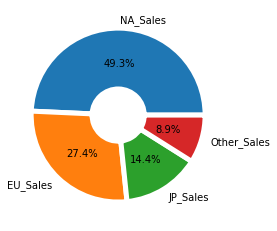

In [280]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(country_total_sales.Sales, labels = country_total_sales.Country, autopct='%.1f%%', wedgeprops=wedgeprops);

In [295]:
#지역별 장르별 판매량
NA_Gnr_sum = data.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
NA_Gnr = pd.DataFrame(NA_Gnr_sum).reset_index()
NA_Gnr['NA_Ratio'] = (NA_Gnr['NA_Sales']/country_total_sales.iloc[0,1]).round(2)

EU_Gnr_sum = data.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)
EU_Gnr = pd.DataFrame(EU_Gnr_sum).reset_index()
EU_Gnr['EU_Ratio'] = (EU_Gnr['EU_Sales']/country_total_sales.iloc[1,1]).round(2)

JP_Gnr_sum = data.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)
JP_Gnr = pd.DataFrame(JP_Gnr_sum).reset_index()
JP_Gnr['JP_Ratio'] = (JP_Gnr['JP_Sales']/country_total_sales.iloc[2,1]).round(2)

Other_Gnr_sum = data.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False)
Other_Gnr = pd.DataFrame(Other_Gnr_sum).reset_index()
Other_Gnr['Other_Ratio'] = (Other_Gnr['Other_Sales']/country_total_sales.iloc[3,1]).round(2)
Other_Gnr

,Genre,Other_Sales,Other_Ratio
0,Action,186.36,0.24
1,Sports,134.60,0.17
2,Shooter,102.58,0.13
3,Racing,76.93,0.10
4,Misc,73.03,0.09
5,Role-Playing,56.79,0.07
6,Platform,51.46,0.07
7,Fighting,36.24,0.05
8,Simulation,31.37,0.04
9,Adventure,16.70,0.02


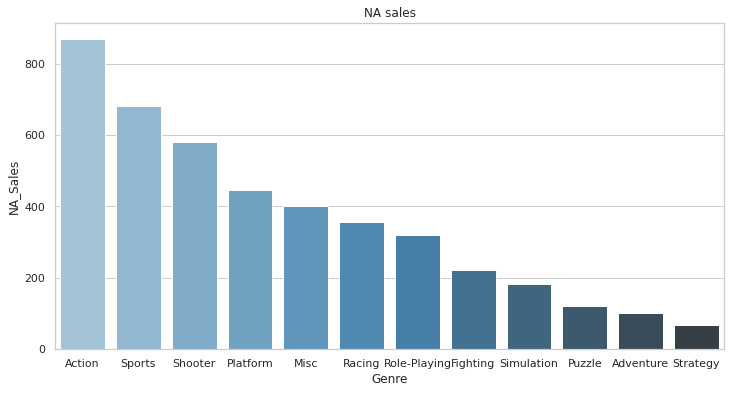

In [312]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))
plt.title('NA sales')
plt.xlabel('Genre')
plt.ylabel('Sales')
sns.barplot(x=NA_Gnr.Genre, y=NA_Gnr.NA_Sales, palette="Blues_d");

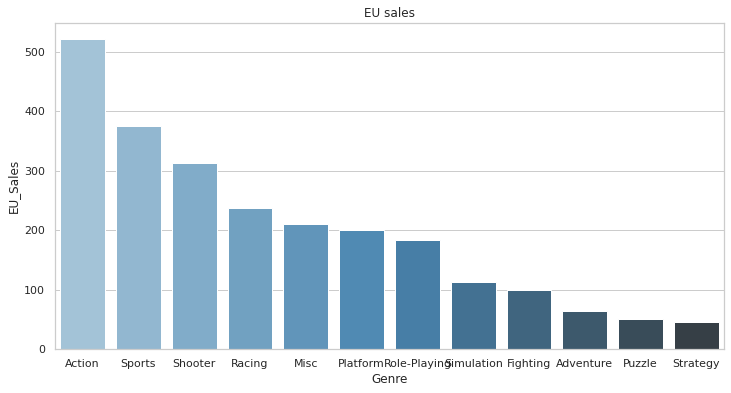

In [313]:
plt.figure(figsize=(12,6))
plt.title('EU sales')
plt.xlabel('Genre')
plt.ylabel('Sales')
sns.barplot(x=EU_Gnr.Genre, y=EU_Gnr.EU_Sales, palette="Blues_d");

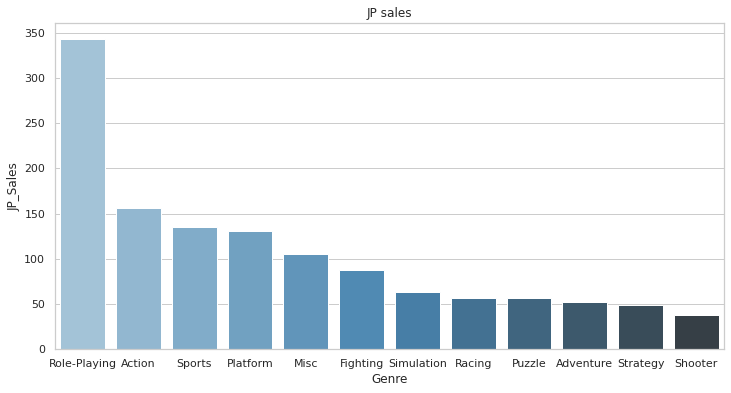

In [314]:
plt.figure(figsize=(12,6))
plt.title('JP sales')
plt.xlabel('Genre')
plt.ylabel('Sales')
sns.barplot(x=JP_Gnr.Genre, y=JP_Gnr.JP_Sales, palette="Blues_d");

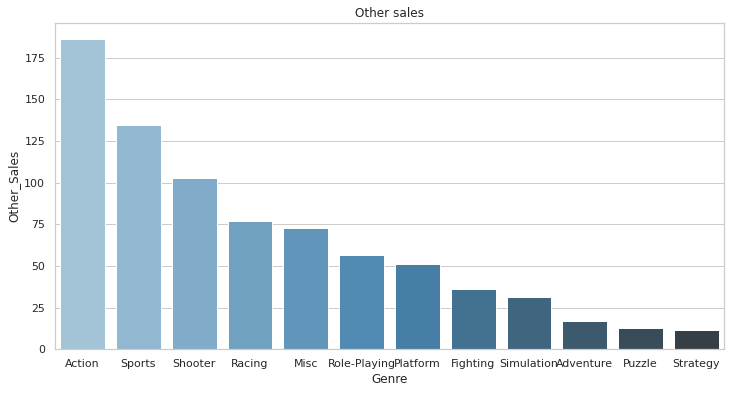

In [315]:
plt.figure(figsize=(12,6))
plt.title('Other sales')
plt.xlabel('Genre')
plt.ylabel('Sales')
sns.barplot(x=Other_Gnr.Genre, y=Other_Gnr.Other_Sales, palette="Blues_d");

In [326]:
# 지역별 판매량
Sales_Gnr = NA_Gnr.merge(EU_Gnr, on='Genre')
Sales_Gnr = Sales_Gnr.merge(JP_Gnr, on='Genre')
Sales_Gnr = Sales_Gnr.merge(Other_Gnr, on='Genre')
Sales_Gnr = Sales_Gnr.set_index('Genre')
Sales_Gnr

,NA_Sales,NA_Ratio,EU_Sales,EU_Ratio,JP_Sales,JP_Ratio,Other_Sales,Other_Ratio
Genre,,,,,,,,
Action,870.01,0.20,521.90,0.22,156.62,0.12,186.36,0.24
Sports,680.60,0.16,375.64,0.16,135.10,0.11,134.60,0.17
Shooter,580.61,0.13,312.89,0.13,38.20,0.03,102.58,0.13
Platform,445.47,0.10,201.14,0.08,130.53,0.10,51.46,0.07
Misc,402.67,0.09,210.97,0.09,105.20,0.08,73.03,0.09
Racing,357.28,0.08,236.83,0.10,56.33,0.04,76.93,0.10
Role-Playing,318.84,0.07,183.16,0.08,343.42,0.27,56.79,0.07
Fighting,221.43,0.05,100.18,0.04,87.15,0.07,36.24,0.05
Simulation,181.88,0.04,113.23,0.05,63.54,0.05,31.37,0.04


In [329]:
col_order = ['NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'NA_Ratio', 'EU_Ratio', 'JP_Ratio', 'Other_Ratio']
Sales_Gnr = Sales_Gnr[col_order]
Sales_Gnr

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,NA_Ratio,EU_Ratio,JP_Ratio,Other_Ratio
Genre,,,,,,,,
Action,870.01,521.90,156.62,186.36,0.20,0.22,0.12,0.24
Sports,680.60,375.64,135.10,134.60,0.16,0.16,0.11,0.17
Shooter,580.61,312.89,38.20,102.58,0.13,0.13,0.03,0.13
Platform,445.47,201.14,130.53,51.46,0.10,0.08,0.10,0.07
Misc,402.67,210.97,105.20,73.03,0.09,0.09,0.08,0.09
Racing,357.28,236.83,56.33,76.93,0.08,0.10,0.04,0.10
Role-Playing,318.84,183.16,343.42,56.79,0.07,0.08,0.27,0.07
Fighting,221.43,100.18,87.15,36.24,0.05,0.04,0.07,0.05
Simulation,181.88,113.23,63.54,31.37,0.04,0.05,0.05,0.04


Text(0.5, 1.0, 'Heatmap of Sales by Genre')

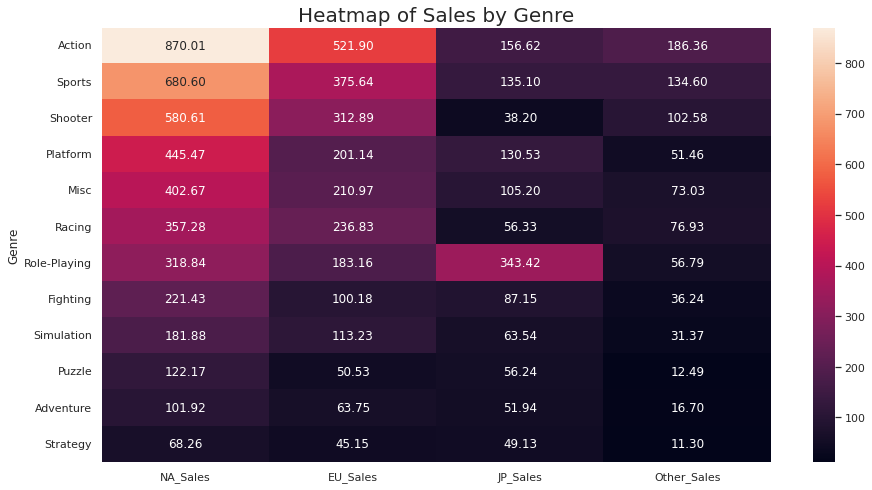

In [334]:
# 히트맵으로 지역별 선호장르 상관관계 확인
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(Sales_Gnr.iloc[:,:4], annot=True, fmt = '.2f')
plt.title('Heatmap of Sales by Genre', fontsize=20)

## 3-2. 연도별로 게임 트렌드가 있을까?

#### 연도별 지역별 판매량 추이

In [405]:
#연도별 지역별 판매량
sales_c_yr = data.groupby('Year')['NA_Sales'].sum().reset_index()
tmp_EU= data.groupby('Year')['EU_Sales'].sum().reset_index()
tmp_JP= data.groupby('Year')['JP_Sales'].sum().reset_index()
tmp_Oth= data.groupby('Year')['Other_Sales'].sum().reset_index()

sales_c_yr = sales_c_yr.merge(tmp_EU, how='outer')
sales_c_yr = sales_c_yr.merge(tmp_JP, how='outer')
sales_c_yr = sales_c_yr.merge(tmp_Oth, how='outer')
sales_c_yr = sales_c_yr.set_index('Year')
sales_c_yr

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70
1985,33.73,4.74,14.56,0.92
1986,12.50,2.84,19.81,1.93
1987,8.46,1.41,11.63,0.20
1988,23.87,6.59,15.76,0.99


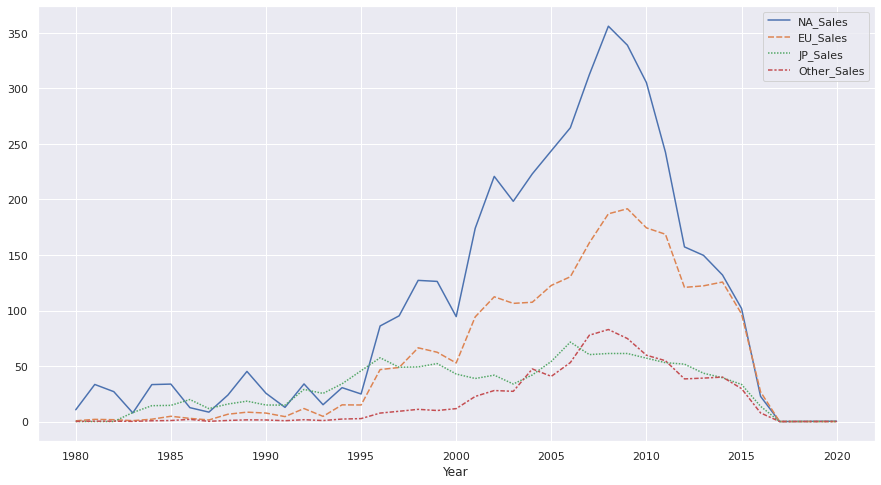

In [406]:
sns.lineplot(data=sales_c_yr);

#### 연도별 장르 선호 추이

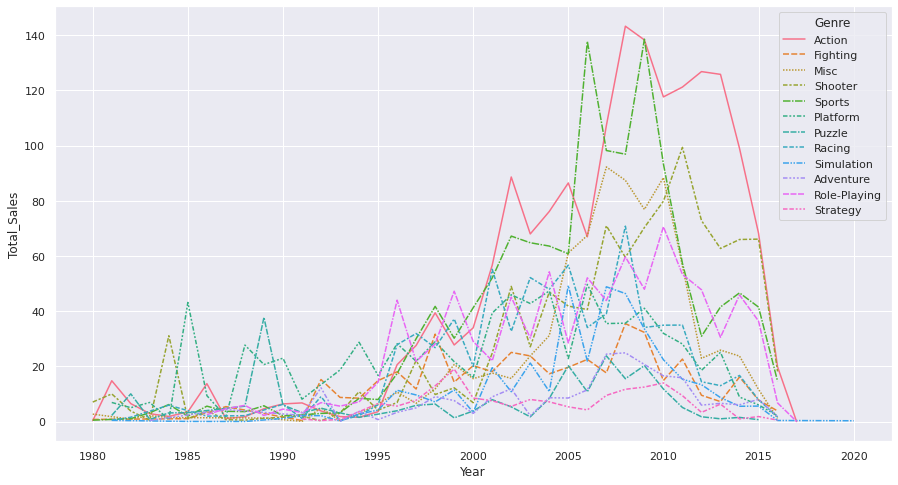

In [412]:
#연도별 장르별 판매량
sales_g_yr = data.groupby(['Year', 'Genre'])['Total_Sales'].sum().reset_index()
sns.lineplot(data=sales_g_yr, x='Year', y='Total_Sales', hue='Genre', style='Genre');

In [422]:
# 2005~2010 장르별 국가별 판매량
eff_1 = data[(data['Year']>=2005) & (data['Year']<2010)]
eff_1_g_sales = eff_1.groupby(['Genre']).sum().iloc[:,-5:].reset_index()
eff_1_g_sales

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,296.08,144.48,35.56,66.21,542.33
1,Adventure,46.47,21.45,14.60,7.53,90.05
2,Fighting,66.07,27.26,17.79,16.53,127.65
3,Misc,189.94,102.37,48.97,43.94,385.22
4,Platform,95.24,49.47,20.39,19.65,184.75
5,Puzzle,40.29,27.81,15.24,7.34,90.68
6,Racing,118.02,75.63,10.91,30.21,234.77
7,Role-Playing,98.92,41.17,73.88,18.15,232.12
8,Shooter,165.35,78.63,6.64,32.68,283.30
9,Simulation,101.45,60.49,19.03,19.06,200.03


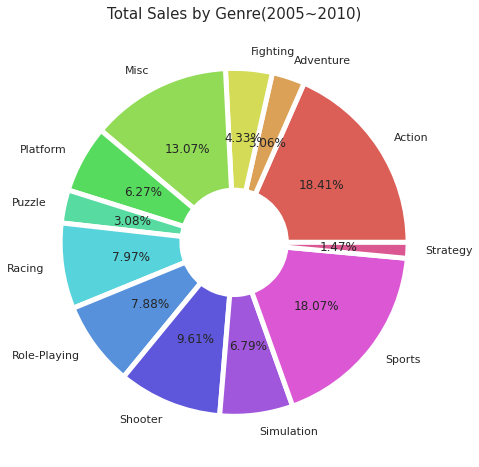

In [434]:
colors = sns.color_palette('hls',len(eff_1_g_sales.Genre))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('Total Sales by Genre(2005~2010)', fontsize=15)
plt.pie(eff_1_g_sales.Total_Sales, labels = eff_1_g_sales.Genre, colors = colors, autopct='%.2f%%', wedgeprops=wedgeprops);

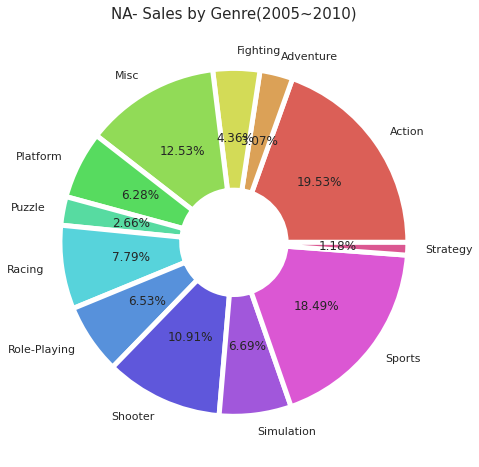

In [433]:
colors = sns.color_palette('hls',len(eff_1_g_sales.Genre))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('NA- Sales by Genre(2005~2010)', fontsize=15)
plt.pie(eff_1_g_sales.NA_Sales, labels = eff_1_g_sales.Genre, colors = colors, autopct='%.2f%%', wedgeprops=wedgeprops);

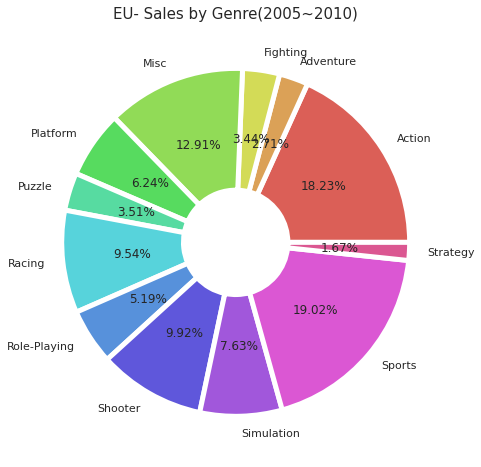

In [435]:
colors = sns.color_palette('hls',len(eff_1_g_sales.Genre))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('EU- Sales by Genre(2005~2010)', fontsize=15)
plt.pie(eff_1_g_sales.EU_Sales, labels = eff_1_g_sales.Genre, colors = colors, autopct='%.2f%%', wedgeprops=wedgeprops);

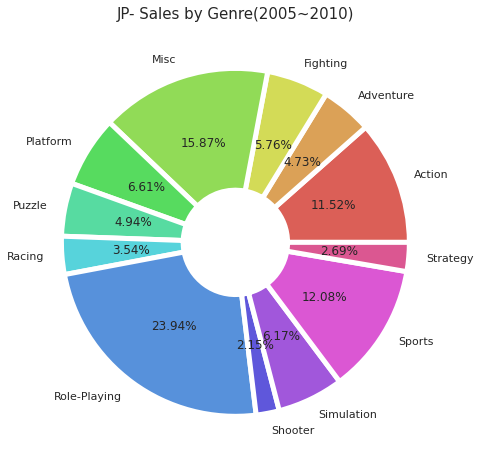

In [436]:
colors = sns.color_palette('hls',len(eff_1_g_sales.Genre))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('JP- Sales by Genre(2005~2010)', fontsize=15)
plt.pie(eff_1_g_sales.JP_Sales, labels = eff_1_g_sales.Genre, colors = colors, autopct='%.2f%%', wedgeprops=wedgeprops);

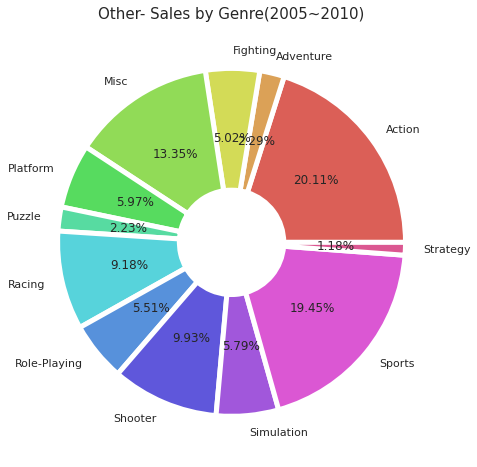

In [437]:
colors = sns.color_palette('hls',len(eff_1_g_sales.Genre))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('Other- Sales by Genre(2005~2010)', fontsize=15)
plt.pie(eff_1_g_sales.Other_Sales, labels = eff_1_g_sales.Genre, colors = colors, autopct='%.2f%%', wedgeprops=wedgeprops);

In [423]:
# 2010~2015 장르별 국가별 판매량
eff_2 = data[(data['Year']>=2010) & (data['Year']<2015)]
eff_2_g_sales = eff_2.groupby(['Genre']).sum().iloc[:,-5:].reset_index()
eff_2_g_sales

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,262.80,208.56,49.04,70.20,590.60
1,Adventure,17.54,15.32,13.36,4.88,51.10
2,Fighting,33.75,17.34,12.33,7.02,70.44
3,Misc,118.56,60.77,18.79,19.18,217.30
4,Platform,52.18,36.01,14.35,10.08,112.62
5,Puzzle,9.92,6.69,2.88,1.66,21.15
6,Racing,43.32,49.64,6.36,14.74,114.06
7,Role-Playing,87.66,55.90,85.77,18.80,248.13
8,Shooter,190.43,135.63,10.25,44.53,380.84
9,Simulation,25.57,22.81,11.32,5.62,65.32


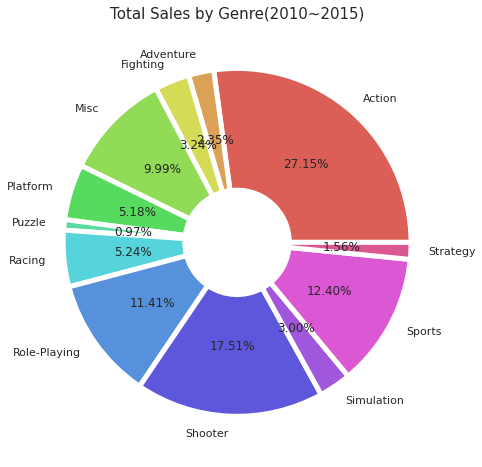

In [443]:
colors = sns.color_palette('hls',len(eff_2_g_sales.Genre))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('Total Sales by Genre(2010~2015)', fontsize=15)
plt.pie(eff_2_g_sales.Total_Sales, labels = eff_2_g_sales.Genre, colors = colors, autopct='%.2f%%', wedgeprops=wedgeprops);

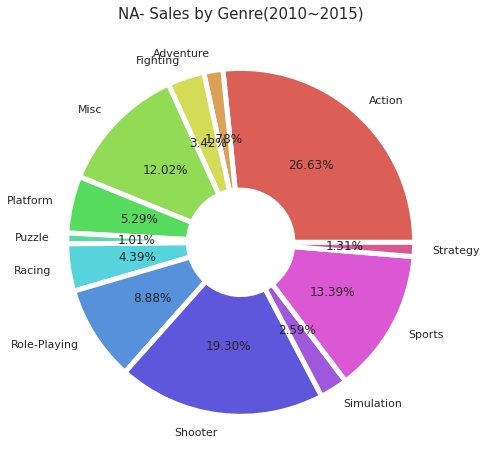

In [439]:
colors = sns.color_palette('hls',len(eff_2_g_sales.Genre))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5} 
plt.title('NA- Sales by Genre(2010~2015)', fontsize=15)
plt.pie(eff_2_g_sales.NA_Sales, labels = eff_2_g_sales.Genre, colors = colors, autopct='%.2f%%', wedgeprops=wedgeprops);

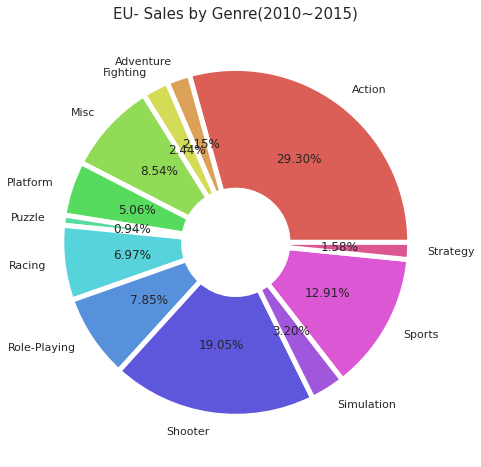

In [440]:
colors = sns.color_palette('hls',len(eff_2_g_sales.Genre))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('EU- Sales by Genre(2010~2015)', fontsize=15)
plt.pie(eff_2_g_sales.EU_Sales, labels = eff_2_g_sales.Genre, colors = colors, autopct='%.2f%%', wedgeprops=wedgeprops);

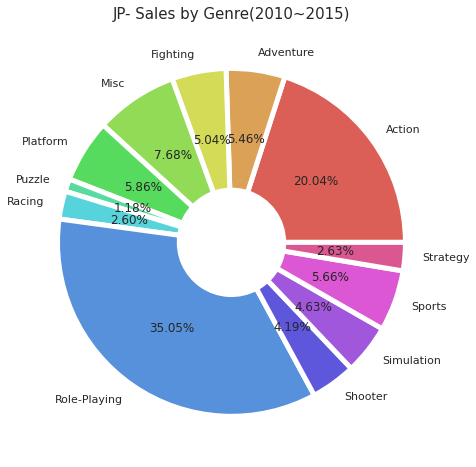

In [441]:
colors = sns.color_palette('hls',len(eff_2_g_sales.Genre))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('JP- Sales by Genre(2010~2015)', fontsize=15)
plt.pie(eff_2_g_sales.JP_Sales, labels = eff_2_g_sales.Genre, colors = colors, autopct='%.2f%%', wedgeprops=wedgeprops);

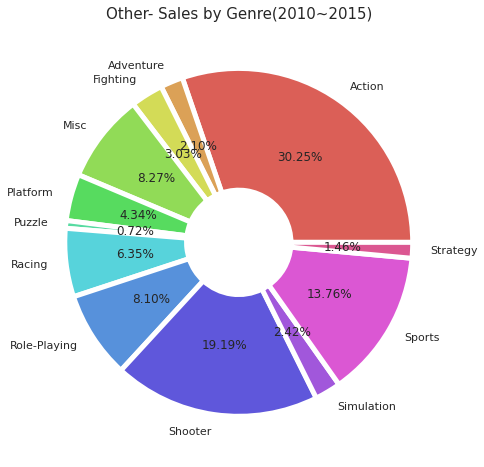

In [442]:
colors = sns.color_palette('hls',len(eff_2_g_sales.Genre))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('Other- Sales by Genre(2010~2015)', fontsize=15)
plt.pie(eff_2_g_sales.Other_Sales, labels = eff_2_g_sales.Genre, colors = colors, autopct='%.2f%%', wedgeprops=wedgeprops);

##3-3. 출고량이 높은 게임에 대한 분석

In [463]:
top10 = data[data['Year']>=2005].sort_values('Total_Sales', ascending=False)[:10]
top10
top30 = data[data['Year']>=2005].sort_values('Total_Sales', ascending=False)[:30]
top30

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
15935,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
7934,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
15937,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
9702,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
15933,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
9705,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9793,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75
7933,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43
15927,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
15928,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


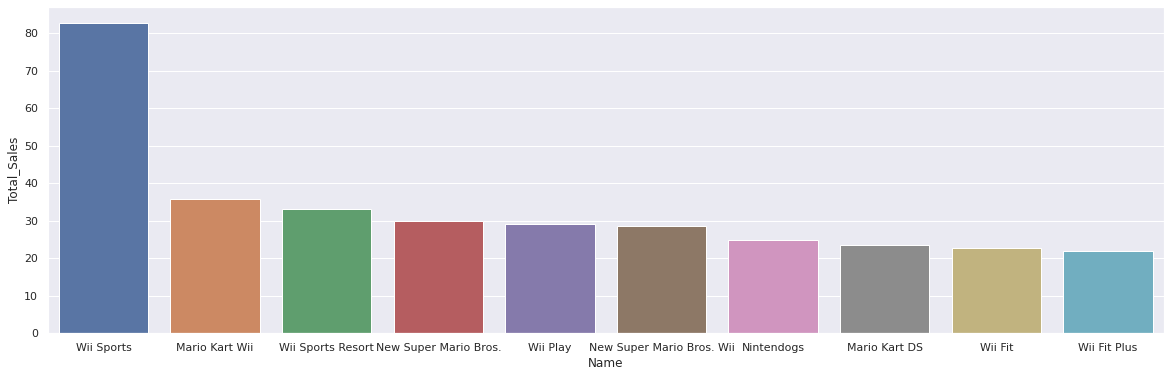

In [464]:
plt.figure(figsize=(20,6))
sns.barplot(data=top10, x='Name', y='Total_Sales');

In [472]:
top10_total = top10['Total_Sales'].sum()
top10_sales = top10.iloc[:,-5:-1].sum().reset_index()
top10_sales.columns = ['Country', 'Sales']
top10_sales = top10_sales.assign(Ratio=lambda x : x.Sales/top10_total)
top10_sales

,Country,Sales,Ratio
0,NA_Sales,150.00,0.451671
1,EU_Sales,113.59,0.342036
2,JP_Sales,37.16,0.111894
3,Other_Sales,31.35,0.094399


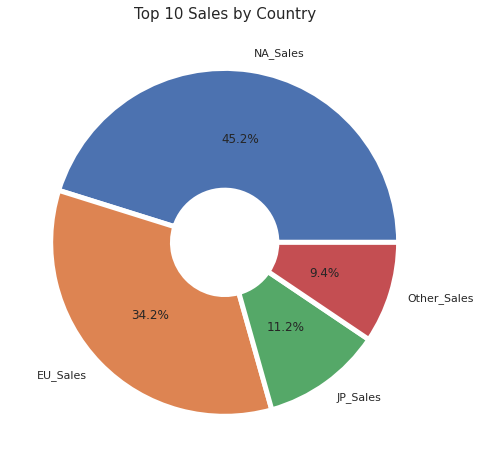

In [477]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('Top 10 Sales by Country', fontsize=15)
plt.pie(top10_sales.Sales, labels = top10_sales.Country, autopct='%.1f%%', wedgeprops=wedgeprops);

In [475]:
top30_total = top30['Total_Sales'].sum()
top30_sales = top30.iloc[:,-5:-1].sum().reset_index()
top30_sales.columns = ['Country', 'Sales']
top30_sales = top30_sales.assign(Ratio=lambda x : x.Sales/top30_total)
top30_sales

,Country,Sales,Ratio
0,NA_Sales,285.35,0.450306
1,EU_Sales,212.10,0.334712
2,JP_Sales,73.11,0.115374
3,Other_Sales,63.12,0.099609


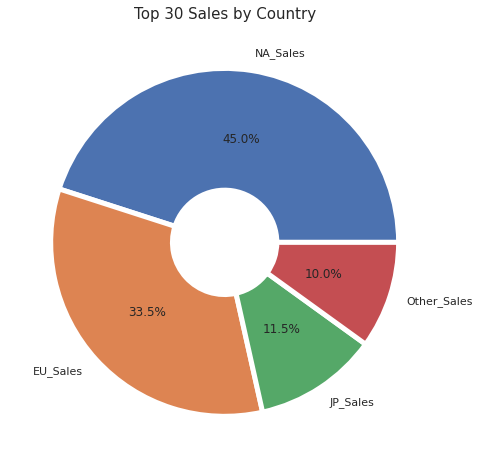

In [481]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('Top 30 Sales by Country', fontsize=15)
plt.pie(top30_sales.Sales, labels = top30_sales.Country, autopct='%.1f%%', wedgeprops=wedgeprops);